#### Name: Rafiul Nakib
#### zID: z5027030
#### Date: 10 Dec 2020

# OLYMPICS

## Context
Which Olympic athletes have the most gold medals? Which countries are they from and how has it changed over time?

More than 35,000 medals have been awarded at the Olympics since 1896. The first two Olympiads awarded silver medals and an olive wreath for the winner, and the IOC retrospectively awarded gold, silver, and bronze to athletes based on their rankings. This dataset includes a row for every Olympic athlete that has won a medal since the first games.

## Content

The complete dataset consists of 3 different files.
1. summer, for summer olympics (1896 - 2012)
2. winter, for winter olympics (1924 - 2014)
3. country, outlining profiles of each participating countries

### Acknowledgements
Data was provided by the IOC Research and Reference Service and published by The Guardian's Datablog.

## The data

Below are the sample portions of the dataset from each individual files loaded into dataframes along with some basic information about the dataframes. 

In [702]:
#Import all the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import seaborn as sns
%matplotlib inline

In [703]:
'''Dataset containing country profile'''
#load data from the .csv file
country = pd.read_csv("country.csv") 

#print the shape of the dataframe (row x columns)
print(country.shape) 

#print a random sample of 5 entries the data
print(country.sample(5)) 

(201, 4)
     Country Code    Population  GDP per Capita
48   Croatia  CRO  4.224404e+06    11535.829356
78    Guyana  GUY  7.670850e+05     4127.351018
40     China  CHN  1.371220e+09     8027.683810
135   Norway  NOR  5.195921e+06    74400.369777
50    Cyprus  CYP  1.165300e+06    23242.840069


In [704]:
'''Dataset containing winter olympic stats'''
winter = pd.read_csv("winter.csv")
print(winter.shape)
print(winter.sample(5))

(5770, 9)
      Year         City    Sport            Discipline               Athlete  \
1702  1976    Innsbruck  Skating        Figure skating    ZAYTSEV, Aleksandr   
4521  2006        Turin   Skiing  Cross Country Skiing        FILBRICH, Jens   
5105  2010    Vancouver   Skiing       Nordic Combined  LAMY CHAPPUIS, Jason   
4618  2006        Turin   Skiing             Snowboard          WHITE, Shaun   
292   1932  Lake Placid  Skating        Figure skating        BURGER, Fritzi   

     Country Gender                              Event   Medal  
1702     URS    Men                              Pairs    Gold  
4521     GER    Men                       4X10KM Relay  Silver  
5105     FRA    Men  Individual, Ski Jumping K90 (70M)    Gold  
4618     USA    Men                          Half-Pipe    Gold  
292      AUT  Women                         Individual  Silver  


In [705]:
'''Dataset containing summer olympic stats''' 
summer = pd.read_csv("summer.csv")
print(summer.shape)
print(summer.sample(5))

(31165, 9)
       Year       City       Sport         Discipline  \
29254  2012     London    Aquatics  Marathon swimming   
5281   1928  Amsterdam  Equestrian           Eventing   
909    1904   St Louis    Football           Football   
15354  1980     Moscow    Aquatics         Water polo   
8367   1952   Helsinki     Cycling       Cycling Road   

                                     Athlete Country Gender            Event  \
29254                    WEINBERGER, Richard     CAN    Men             10KM   
5281   PAHUD DE MORTANGES, Charles Ferdinand     NED    Men             Team   
909                          JOHNSON, Albert     CAN    Men         Football   
15354                        GOPCEVIC, Zoran     YUG    Men       Water Polo   
8367                   VICTOR, Lucien Honore     BEL    Men  Team Time Trial   

        Medal  
29254  Bronze  
5281     Gold  
909      Gold  
15354  Silver  
8367     Gold  


In [715]:
#Check whether the winter and the summer datasets have exact same columns or not
print(winter.columns == summer.columns) 

[ True  True  True  True  True  True  True  True  True]


## What is the data saying?

So we can see from above that "country" dataset has 4 columns namely Country, Code, Population and GDP per Capita.
The "winter" and "summer" datasets have exact same 9 columns namely Year, City, Sport, Discipline, Athelete, Country, Gender, Event and Medal.

In this project I will try to find answers for the following questions that crossed my mind after briefly inspecting the above data.

1. If points were given to each types of medals as follows e.g. Gold = 3, Silver = 2, Bronze = 1, which country is the most successful in the history of olympics (summer and winter combined), based on the number of medals won? Also, show a plot of ranking of the countries based on total points accumulated by each participating countries in the history of olympics that have won at least 50 points.

2. Do the same as question 1 but this time instead of countries, for individual atheletes. This time rank the athletes with at least 12 points.

3. Compare the number of men's events with the number of women's events in each olympics (both summer and winter) and make plots to visualise the difference.

4. Is there any relation between the success rate of a participating country with that country's per capita GDP? 

5. Is there any relation between the success rate of a participating country with that country's population? 

6. How many cities have hosted any form of olympics so far? List all the cities and also create a wordcloud with the name of all such cities?

### Question 1
If points were given to each types of medals as follows e.g. Gold = 3, Silver = 2, Bronze = 1, which country is the most successful in the history of olympics (summer and winter combined), based on the number of medals won? Also, show a plot of ranking of the countries based on total points accumulated by each participating countries in the history of olympics that have at least 50 points.

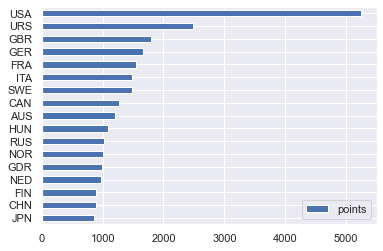

In [716]:
#combine winter and summer dataframes into one big dataframe
bigdata = summer.append(winter, ignore_index=True)

#Replace "Medal" column values with their corresponding points
bigdata['Medal'] = bigdata['Medal'].replace(
    ['Gold', 'Silver', 'Bronze'],
    [3, 2, 1],
)
#Rename "Medal" column name using a dictionary to a more sensible one
bigdata = bigdata.rename(
    # Rename using a dictionary
    columns = {'Medal': 'Points'} 
)

#Initialise lists for each entry of "Country" and "Points"
country_name = []
points_total = []

#Make a list of all the Country entries
for i in range(len(bigdata)):
    country_name.append(bigdata.loc[i, "Country"])

#Make list of all the points entry
for i in range(len(bigdata)):
    points_total.append(bigdata.loc[i, "Points"])

#Initialise dictionary
points_count_per_country = {}

#Iterate through each Country and points and count points
for i in range(len(country_name)):
    if points_total[i] == 3 or points_total[i] == 2 or points_total[i] == 1:
        if country_name[i] in points_count_per_country:
            points_count_per_country[country_name[i]] += 1
        else:
            points_count_per_country[country_name[i]] = 1

#Load the dictionary 'points_count_per_country' into a new dataframe
df1 = pd.DataFrame.from_dict(points_count_per_country, orient = 'index', columns=['points'])

#Sort the dataframe by points in descending order
df1 = df1.sort_values(
    by = 'points',
    ascending = True
)

#Get the final dataframe showing countries with at least 750 points
final_df1 = df1[df1['points'] >= 750]

#Plot to show countries with at least 750 points
final_df1.plot(
    kind = 'barh' # Horizontal bars
)

So, from the above plot it can be seen that the most successful country in the history of olympics is USA.

### Question 2

Do the same as question 1 but this time instead of countries, for individual atheletes. This time rank the athletes with at least 10 points.


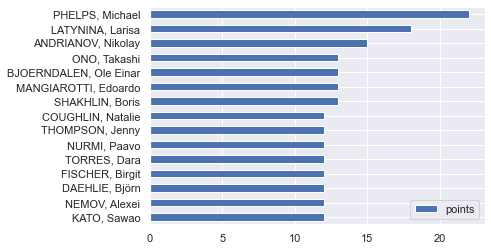

In [709]:
#Initialise lists for each entry "Athlete" and "Points"
athlete_name = []
points_total_per_athlete = []

#Make a list of all the Athlete entries
for i in range(len(bigdata)):
    athlete_name.append(bigdata.loc[i, "Athlete"])

#Make list of all the points entry
for i in range(len(bigdata)):
    points_total_per_athlete.append(bigdata.loc[i, "Points"])

#Initialise dictionary
points_count_per_athlete = {}

#Iterate through each Athlete and points and count points
for i in range(len(athlete_name)):
    if points_total_per_athlete[i] == 3 or points_total_per_athlete[i] == 2 or points_total_per_athlete[i] == 1:
        if athlete_name[i] in points_count_per_athlete:
            points_count_per_athlete[athlete_name[i]] += 1
        else:
            points_count_per_athlete[athlete_name[i]] = 1

#Load the dictionary 'points_count_per_athlete' into a new dataframe
df2 = pd.DataFrame.from_dict(points_count_per_athlete, orient = 'index', columns=['points'])

#Sort the dataframe by points in descending order
df2 = df2.sort_values(
    by = 'points',
    ascending = True
)
#Get the final dataframe showing athletes with at least 12 points
final_df2 = df2[df2['points'] >= 12]

#Plot to show countries with at least 12 points
final_df2.plot(
    kind = 'barh' # Horizontal bars
)

So, from the above plot it can be seen that the most successful athlete in the history of olympics is Michael Phelps.

### Question 3

Compare the number of men's events with the number of women's events in each olympics (both summer and winter) and make a plot to visualise the difference.

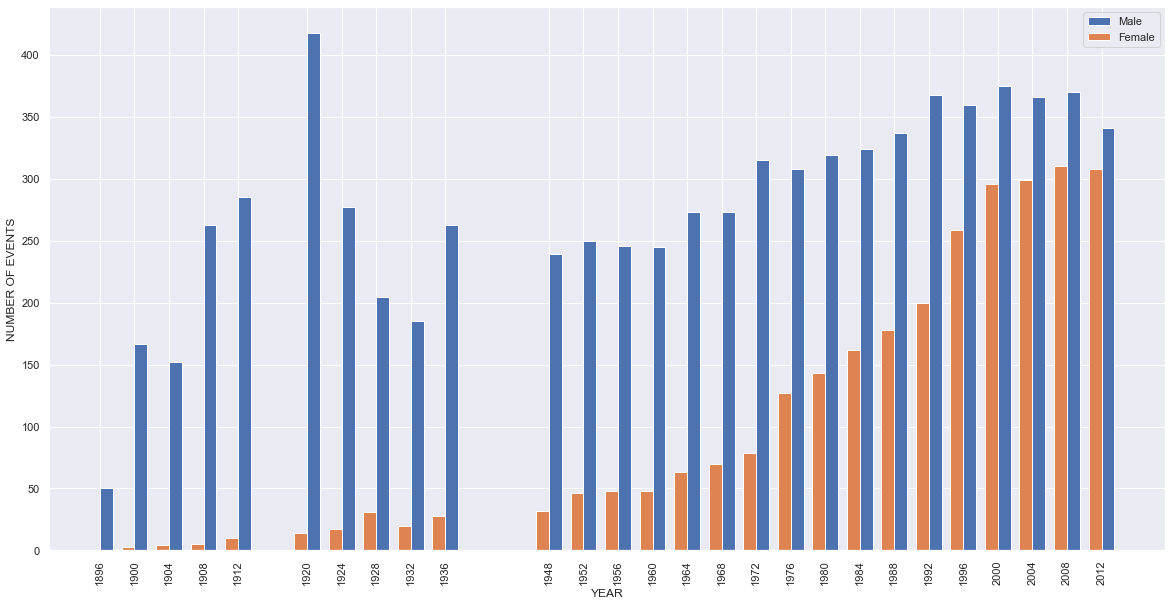

In [710]:
'''Summer olympics'''

#Initialise lists for each entry of "Year" and "Gender"
years_summer = []
gender_summer = []

#Make a list of all the year entries
for i in range(len(summer)):
    years_summer.append(summer.loc[i, "Year"])

#Make a list of all the gender entries
for i in range(len(summer)):
    gender_summer.append(summer.loc[i, "Gender"])

#Initialise dictionary
female_count = {}
male_count = {}

#Iterate through each year and gender and count females
for i in range(len(years_summer)):
    if gender_summer[i] == 'Women':
        if years_summer[i] in female_count:
            female_count[years_summer[i]] += 1
        else:
            female_count[years_summer[i]] = 1

#Iterate through each year and gender and count males
for i in range(len(years_summer)):
    if gender_summer[i] == 'Men':
        if years_summer[i] in male_count:
            male_count[years_summer[i]] += 1
        else:
            male_count[years_summer[i]] = 1
            
#Getting the exact number of events, since each event was counted 3 times for 3 different types of medals
EVENT_REPEAT = 3

for i in female_count:
    female_count[i] = int(female_count[i]/EVENT_REPEAT)

for i in male_count:
    male_count[i] = int(male_count[i]/EVENT_REPEAT)

#Plot a bar plot to show the comparison
A = male_count
B = female_count

fig, (ax) = plt.subplots(1, figsize=(20,10))
ax.bar(A.keys(), A.values(), width=1.5, align='edge', label='Male')
ax.bar(B.keys(), B.values(), width=-1.5, align='edge', label='Female')
ax.set_xlabel('YEAR')
ax.set_ylabel('NUMBER OF EVENTS')
ax.legend()

#collect all dictionary keys
all_keys=set(list(A.keys()) + list(B.keys()))

#set ticks where dictionary keys exist and rotate them because of space problems
ax.set_xticks(list(all_keys))
ax.tick_params(axis="x", labelrotation=90)

So, from the above graph we can see that traditionally there have been more men's events in the summer olympics than women's. However, the participation of women in the olympics have gradually increased (almost exponentially) over the years after the Second World War (See that gap between late 30's and late 40's). In the beginning years of olympics, the number of women's events as compared to men's events were very much insignificant. 

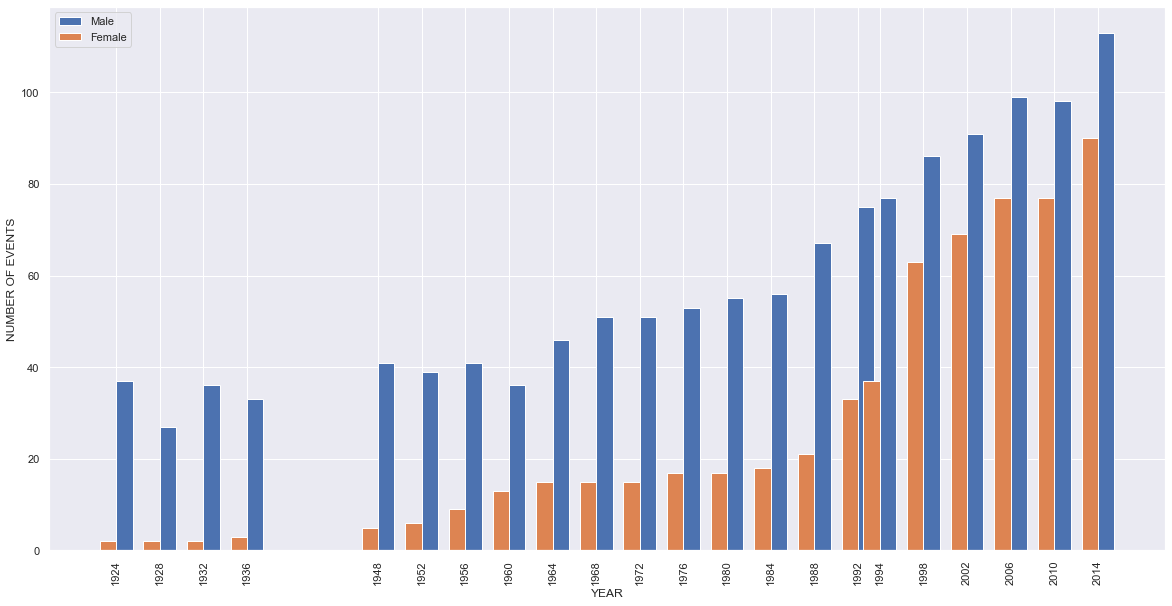

In [711]:
'''Winter olympics'''
#Initialise lists for each entry of "Year" and "Gender"
years_winter = []
gender_winter = []

#Make a list of all the year entries
for i in range(len(winter)):
    years_winter.append(winter.loc[i, "Year"])

#Make a list of all the gender entries
for i in range(len(winter)):
    gender_winter.append(winter.loc[i, "Gender"])

#Initialise dictionary
female_count = {}
male_count = {}

#Iterate through each year and gender and count females
for i in range(len(years_winter)):
    if gender_winter[i] == 'Women':
        if years_winter[i] in female_count:
            female_count[years_winter[i]] += 1
        else:
            female_count[years_winter[i]] = 1

#Iterate through each year and gender and count males
for i in range(len(years_winter)):
    if gender_winter[i] == 'Men':
        if years_winter[i] in male_count:
            male_count[years_winter[i]] += 1
        else:
            male_count[years_winter[i]] = 1

#Getting the exact number of events, since each event was counted 3 times for 3 different types of medals
EVENT_REPEAT = 3

for i in female_count:
    female_count[i] = int(female_count[i]/EVENT_REPEAT)

for i in male_count:
    male_count[i] = int(male_count[i]/EVENT_REPEAT)

#Plot a bar plot to show the comparison
A = male_count
B = female_count

fig, (ax) = plt.subplots(1, figsize=(20,10))
ax.bar(A.keys(), A.values(), width=1.5, align='edge', label='Male')
ax.bar(B.keys(), B.values(), width=-1.5, align='edge', label='Female')
ax.set_xlabel('YEAR')
ax.set_ylabel('NUMBER OF EVENTS')
ax.legend()

#collect all dictionary keys
all_keys=set(list(A.keys()) + list(B.keys()))

#set ticks where dictionary keys exist and rotate them because of space problems
ax.set_xticks(list(all_keys))
ax.tick_params(axis="x", labelrotation=90)

Now for winter olympics, from the above graph we can see again that traditionally there have been more men's events in the winter olympics than women's, just like it was the case for summer olympics. However, the participation of women in the winter olympics have gradually increased over the years since early 80's while prior to that it was increasing at a decreasing rate.

### Question 4

Is there any relation between the success rate of a participating country with that country's per capita GDP?


            Country Code   Population           GDP  points
0     United States  USA  321418820.0  56115.718426  5238.0
1    United Kingdom  GBR   65138232.0  43875.969614  1799.0
2           Germany  GER   81413145.0  41313.313995  1665.0
3            France  FRA   66808385.0  36205.568102  1548.0
4             Italy  ITA   60802085.0  29957.804315  1488.0
..              ...  ...          ...           ...     ...
113           Sudan  SUD   40234882.0   2414.723601     1.0
114       Macedonia  MKD    2078453.0   4852.657848     1.0
115       Mauritius  MRI    1262605.0   9252.110724     1.0
116           Niger  NIG   19899120.0    358.958152     1.0
117            Togo  TOG    7304578.0    559.635877     1.0

[118 rows x 5 columns]


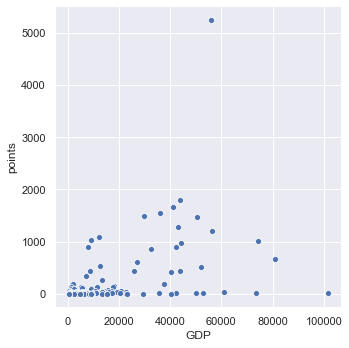

In [712]:
#Rename "Medal" column name using a dictionary to a more sensible one
country = country.rename(
    # Rename using a dictionary
    columns = {'GDP per Capita': 'GDP'} 
)
#Merge the country dataframe to df1 dataframe from Question 1 to include the 'points' column
df3 = country.merge(df1, left_on=['Code'], right_index=True, how='left')

#Drop any rows with missing values and sort by most successful country by points
df3.dropna(inplace=True)
df3 = df3.sort_values(
    by = 'points',
    ascending = False,
)
#Reset the index 
df3.reset_index(drop=True, inplace=True)
print(df3)

#Scatter plot using seaborn
# Apply the default seaborn style
sns.set() 
#Use a seaborn relplot
sns.relplot( 
    #Specify the data source
    data = df3, 
    #Specify the kind of plot
    kind = 'scatter', 
    x = 'GDP',
    y = 'points',
)


From the above scatter plot it can be infered that countries with lower GDP are less successful in the olympics, the crowd at the bottom-left corner indicates that. While this might be true, it is not completely true that countries with more GDP are more successful in the olympics. In fact the 5 countries with most GDPs are less successful than the most successful 8 countries in the olympics that have significantly lower GDPs than them. So, there is no direct relation between a country's GDP and success rate at the olympics. 

### Question 5
Is there any relation between the success rate of a participating country with that country's population?

           Country Code    Population           GDP  points
0            China  CHN  1.371220e+09   8027.683810   889.0
1            India  IND  1.311051e+09   1598.259034   184.0
2    United States  USA  3.214188e+08  56115.718426  5238.0
3        Indonesia  INA  2.575638e+08   3346.487039    38.0
4           Brazil  BRA  2.078475e+08   8538.589975   431.0
..             ...  ...           ...           ...     ...
113        Bahamas  BAH  3.880190e+05  22817.230857    27.0
114        Iceland  ISL  3.308230e+05  50173.339916    17.0
115       Barbados  BAR  2.842150e+05  15429.340464     1.0
116        Grenada  GRN  1.068250e+05   9212.020352     1.0
117          Tonga  TGA  1.061700e+05   4098.543929     1.0

[118 rows x 5 columns]


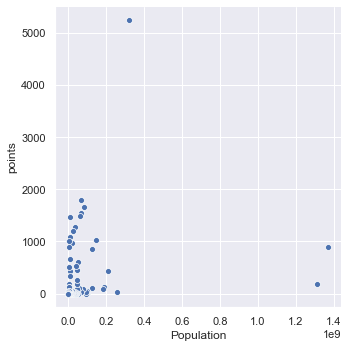

In [713]:
#Sort the merged dataframe from question 5 by 'Population'
df4 = df3.sort_values(
    by = 'Population',
    ascending = False,
)
#Reset index
df4.reset_index(drop=True, inplace=True)
print(df4)

#Scatter plot as before in question 5 but now for population
sns.set() 
sns.relplot( 
    data = df4, 
    kind = 'scatter',
    x = 'Population',
    y = 'points',
)

From the above scatter plot, it is pretty obvious that highly populated countries are not very successful in the olympics, with the two exceptions of China and India.

### Question 6

How many cities have hosted any form of olympics so far? List all the cities and also create a wordcloud with the name of all such cities?

41 have hosted an event of either summer or winter olympics so far. The cities are:
Athens
Paris
St Louis
London
Stockholm
Antwerp
Amsterdam
Los Angeles
Berlin
Helsinki
Melbourne / Stockholm
Rome
Tokyo
Mexico
Munich
Montreal
Moscow
Seoul
Barcelona
Atlanta
Sydney
Beijing
Chamonix
St.Moritz
Lake Placid
Garmisch Partenkirchen
Oslo
Cortina d'Ampezzo
Squaw Valley
Innsbruck
Grenoble
Sapporo
Sarajevo
Calgary
Albertville
Lillehammer
Nagano
Salt Lake City
Turin
Vancouver
Sochi


(-0.5, 999.5, 499.5, -0.5)

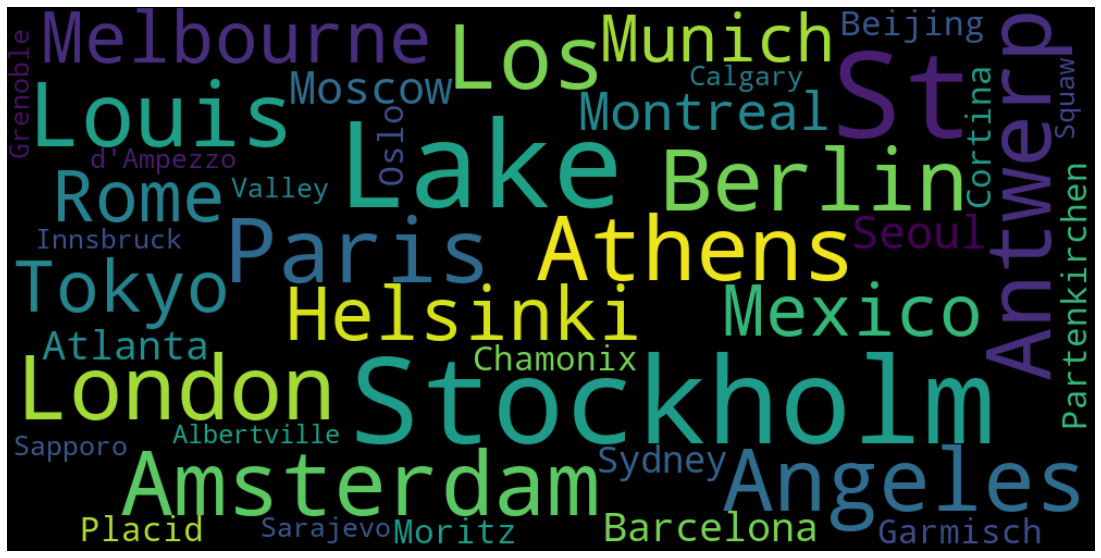

In [717]:
#Create an array with unique city names from the combined dataframe in question 1
city = bigdata['City'].unique()
#Print the answer to the question
print(str(len(city)) + " have hosted an event of either summer or winter olympics so far. The cities are:")

#Loop through the array to list the cities
for i in city:
    print(i)
    
#Plot a wordcloud to show all the city names like in a poster
wordcloud = WordCloud(width = 1000, height = 500, max_font_size = 110, max_words = 41).generate(" ".join(city))
plt.figure(figsize=(30,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")


# THE END